In [1]:
import ssl
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D,BatchNormalization,Dense, Flatten,Dropout
from tensorflow.python.keras.utils.np_utils import to_categorical

In [2]:
ssl._create_default_https_context = ssl._create_unverified_context
people = fetch_lfw_people(min_faces_per_person=70)
images= people.images
labels=people.target
n=7
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.20)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

img_x, img_y = 62,47
x_train = x_train.reshape(x_train.shape[0], img_x, img_y, 1)
x_test = x_test.reshape(x_test.shape[0], img_x, img_y, 1)

In [3]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5,5), activation='relu',
                 kernel_initializer='uniform',input_shape=(img_x, img_y, 1)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=(1,1)))
model.add(Conv2D(64, kernel_size=(5,5), activation='relu'
                 ,kernel_initializer='uniform'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=(1,1)))
model.add(Dropout(0.5))
model.add(Conv2D(64, kernel_size=(5,5), activation='relu'
                 ,kernel_initializer='uniform'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=(1,1)))
model.add(Dropout(0.5))
model.add(Conv2D(64, kernel_size=(5,5), activation='relu'
                 ,kernel_initializer='uniform'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=(1,1)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(120, activation='relu',kernel_initializer='uniform'))
model.add(Dense(84, activation='relu',kernel_initializer='uniform'))
model.add(Dense(n, activation='softmax'))

model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [4]:
y_train = to_categorical(y_train,n)
y_test = to_categorical(y_test,n)

In [5]:
history = model.fit(x_train, y_train,validation_split=0.20, validation_data=None, shuffle=True, batch_size=128, epochs=150)
score = model.evaluate(x_train, y_train)
print('training accuracy', score[1]*100,"%")
score = model.evaluate(x_test, y_test)
print('testing accuracy', score[1]*100,"%")

Epoch 1/150
7/7 [==============================] - 78s 10s/step - loss: 5.1780 - accuracy: 0.2427 - val_loss: 2.4944 - val_accuracy: 0.4563
Epoch 2/150
7/7 [==============================] - 73s 10s/step - loss: 1.9077 - accuracy: 0.4041 - val_loss: 8.8323 - val_accuracy: 0.4563
Epoch 3/150
7/7 [==============================] - 71s 10s/step - loss: 1.5098 - accuracy: 0.4927 - val_loss: 15.2337 - val_accuracy: 0.4563
Epoch 4/150
7/7 [==============================] - 71s 10s/step - loss: 1.1938 - accuracy: 0.5510 - val_loss: 18.9509 - val_accuracy: 0.4563
Epoch 5/150
7/7 [==============================] - 72s 10s/step - loss: 1.0863 - accuracy: 0.6214 - val_loss: 21.7881 - val_accuracy: 0.4563
Epoch 6/150
7/7 [==============================] - 72s 10s/step - loss: 0.8922 - accuracy: 0.6954 - val_loss: 23.7877 - val_accuracy: 0.4563
Epoch 7/150
7/7 [==============================] - 76s 11s/step - loss: 0.7534 - accuracy: 0.7451 - val_loss: 24.7518 - val_accuracy: 0.4563
Epoch 8/150
7/7

In [6]:
scor = model.evaluate( x_test,  y_test, verbose=0)

print('test los {:.4f}'.format(scor[0]))
print('test acc {:.4f}'.format(scor[1]))

test los 4.6895
test acc 0.4419


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


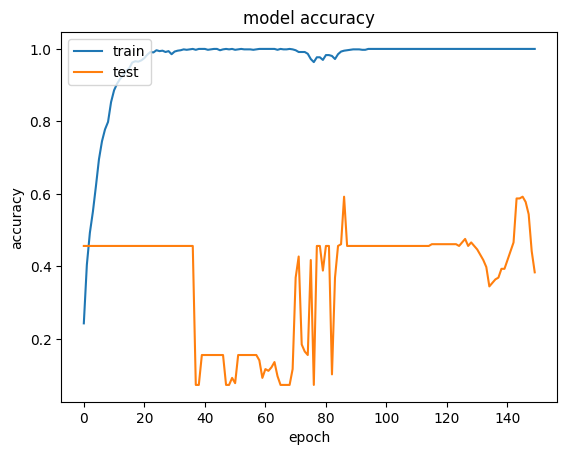

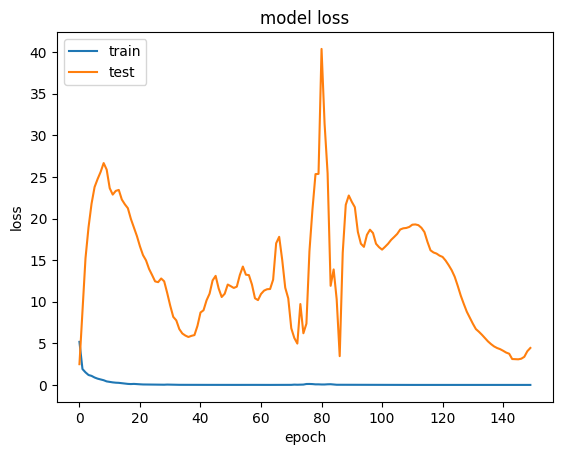

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [14]:
y_pred = model.predict(x_test)

9/9 [==============================] - 7s 636ms/step
